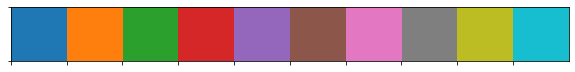

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import h5py

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

data_dir = "/home/stavros/DATA/ClockV3"
cp = sns.color_palette()
sns.palplot(cp)
plt.show()

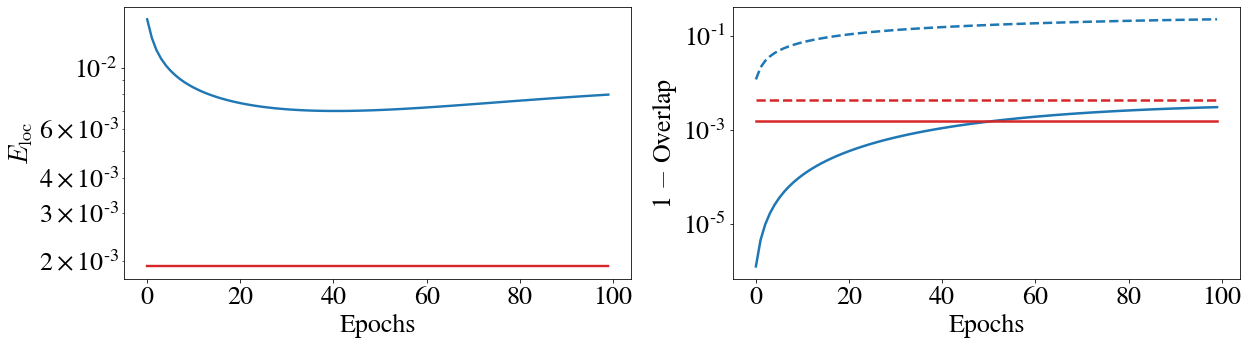

In [10]:
machine_type = "fullwv"
n_sites = 6
time_steps = 20

filename = "sanity_check_sweep_one_term_{}_N{}M{}.h5".format(machine_type, n_sites, time_steps)
sweep_sanity = h5py.File("{}/histories/{}".format(data_dir, filename), "r")
filename = "sanity_check_sweep_{}_N{}M{}.h5".format(machine_type, n_sites, time_steps)
sweep_normal = h5py.File("{}/histories/{}".format(data_dir, filename), "r")

plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.semilogy(sweep_normal["exact_Eloc"][()].real, color=cp[0], linewidth=2.4)
plt.semilogy(sweep_sanity["exact_Eloc"][()].real, color=cp[3], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")

plt.subplot(122)
plt.semilogy(1 - sweep_normal["overlaps"][()], linewidth=2.5, color=cp[0], linestyle="--")
plt.semilogy(1 - sweep_sanity["overlaps"][()], linewidth=2.5, color=cp[3], linestyle="--")

plt.semilogy(1 - sweep_normal["avg_overlaps"][()][-n:], linewidth=2.5, color=cp[0])
plt.semilogy(1 - sweep_sanity["avg_overlaps"][()], linewidth=2.5, color=cp[3])

plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")

plt.show()
sweep_sanity.close()
sweep_normal.close()

100
100


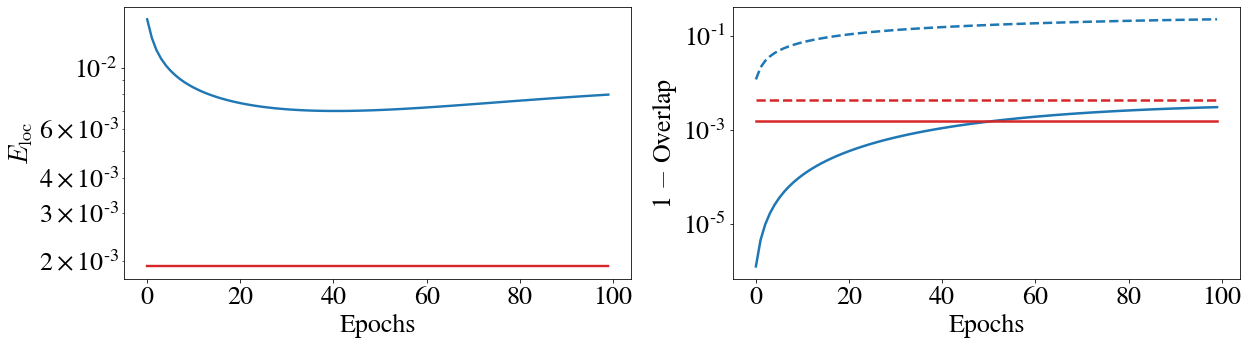

In [28]:
machine_type = "fullwv"
n_sites = 6
time_steps = 20

filename = "sanity_check_exact_oneterm_{}_N{}M{}.h5".format(machine_type, n_sites, time_steps)
sweep_sanity = h5py.File("{}/histories/{}".format(data_dir, filename), "r")
filename = "sanity_check_exact_{}_N{}M{}.h5".format(machine_type, n_sites, time_steps)
sweep_normal = h5py.File("{}/histories/{}".format(data_dir, filename), "r")

n = len(sweep_sanity["exact_Eloc"][()])

plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.semilogy(sweep_normal["exact_Eloc"][()][-n:].real, color=cp[0], linewidth=2.4)
plt.semilogy(sweep_sanity["exact_Eloc"][()].real, color=cp[3], linewidth=2.4)
plt.xlabel("Epochs")
plt.ylabel("$E_\mathrm{loc}$")

plt.subplot(122)
plt.semilogy(1 - sweep_normal["overlaps"][()][-n:], linewidth=2.5, color=cp[0], linestyle="--")
plt.semilogy(1 - sweep_sanity["overlaps"][()], linewidth=2.5, color=cp[3], linestyle="--")

plt.semilogy(1 - sweep_normal["avg_overlaps"][()][-n:], linewidth=2.5, color=cp[0])
plt.semilogy(1 - sweep_sanity["avg_overlaps"][()], linewidth=2.5, color=cp[3])

plt.xlabel("Epochs")
plt.ylabel("1 $-$ Overlap")

print(n)
print(len(sweep_normal["overlaps"][()][-n:]))

plt.show()
sweep_sanity.close()
sweep_normal.close()

In [11]:
from utils import ed
from utils import tfim

In [12]:
n_sites = 6
time_steps = 20
h_ev = 0.5
t_final = 1.0

t = np.linspace(0.0, t_final, time_steps + 1)
dt = t[1] - t[0]

ham = tfim.tfim_hamiltonian(n_sites, h=h_ev)
clock = ed.construct_sparse_clock(ham, dt, time_steps)
get_clock_energy = lambda state: (state.ravel().conj().dot(clock.toarray().dot(state.ravel())) 
                                  / (np.abs(state)**2).sum())

sweep_two_term_state = np.load("{}/final_dense/sweep_fullwv_N{}M{}.npy".format(data_dir, n_sites, time_steps))
sweep_one_term_state = np.load("{}/final_dense/sweep_oneterm_oneepoch_fullwv_N{}M{}.npy".format(data_dir, n_sites, time_steps))

print("One term: {}".format(get_clock_energy(sweep_one_term_state)))
print("Two term: {}".format(get_clock_energy(sweep_two_term_state)))

One term: (0.0019181053950620584+2.237142200250603e-17j)
Two term: (0.002217664554412223+2.8541021925833825e-17j)
